In [195]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [196]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
import numpy as np 
from scipy.stats import pearsonr

In [197]:
import pickle

In [198]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
print( len( combos ) ) 

15


In [199]:
en_preds = []

for nm, target, X, y, support in combos:
    skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
    net = ElasticNetCV( cv=skf, max_iter=1e9 )
    net.fit( X, y ) 
    preds = net.predict( X )
    score = pearsonr( preds, y ) 
    coefs = zip( support, net.coef_ ) 
    en_preds.append( ( nm, target, X, y, preds, score, net, coefs ) ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is to

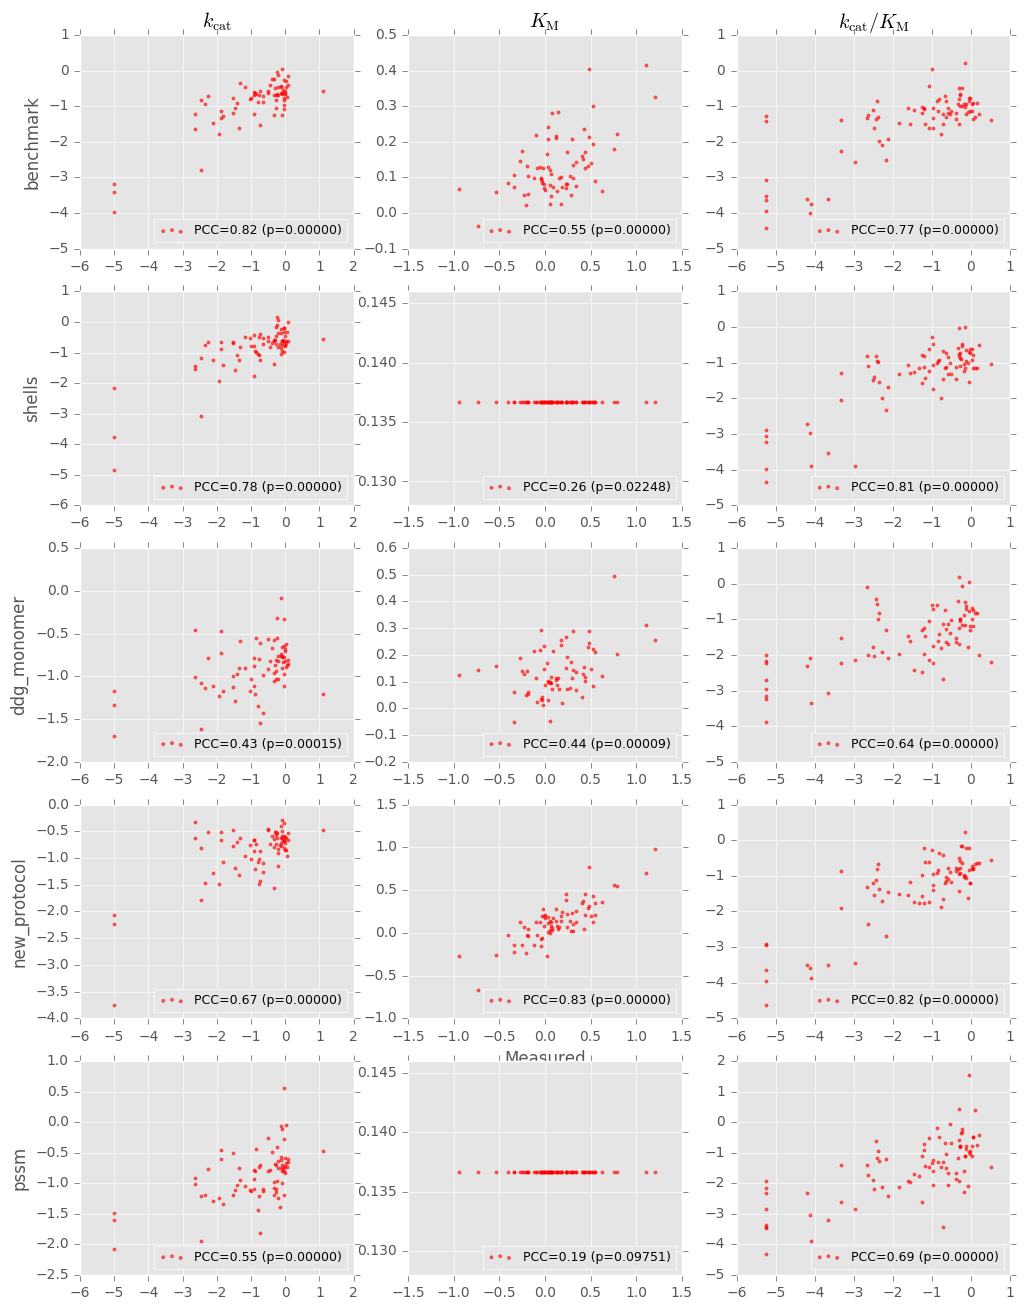

In [200]:
plt.figure( figsize=( 12, 16 ) ) 

for i, ( nm, target, X, y, preds, score, net, coefs ) in enumerate( en_preds ):
    
        plt.subplot( len( combos ) / 3, 3, i+1 )
        
        if i == 0:
            plt.title( '$k_{\mathrm{cat}}$' )
            plt.ylabel( nm ) 
        elif i == 1:
            plt.title( '$K_\mathrm{M}$' )
        elif i == 2:
            plt.title( '$k_{\mathrm{cat}}/K_\mathrm{M}$' ) 
        elif i % 3 == 0:
            plt.ylabel( nm ) 
        elif i == 10:
            plt.xlabel( 'Measured' ) 
        else:
            pass
        
        plt.scatter( y, preds, marker='.', color='red', alpha=.6 )
        plt.legend( [ 'PCC={0:.2f} (p={1:.5f})'.format( *score ) ], loc='lower right', fontsize='9' ) 
        
plt.show()

In [201]:
# feature weights 

my_rows = []

for i, ( nm, target, X, y, preds, score, net, coefs ) in enumerate( en_preds ):
    for feature, weight in coefs:
        my_rows.append( ( feature, weight, nm ) ) 
        
df = pandas.DataFrame( my_rows, columns=[ 'feature', 'weight', 'feature_set' ] )
#g = df.groupby( 'feature_set' ).apply( lambda x: x.sort_values() )
df[ ( df.weight > 0.01 ) ] 

,feature,weight,feature_set
0,total_score,0.314331,benchmark
1,fa_rep,0.220993,benchmark
5,tot_nlpstat_pm,0.431249,benchmark
6,tot_burunsat_pm,1.235259,benchmark
8,tot_NLconts_pm,0.112241,benchmark
12,tot_total_neg_charges,0.295281,benchmark
16,SR_1_fa_rep,0.251859,benchmark
18,SR_1_all_cst,0.181901,benchmark
19,SR_1_hbond_pm,0.060660,benchmark
20,SR_1_burunsat_pm,0.703645,benchmark


In [205]:
# do the multiple cross-validation 

en_preds = []

for nm, target, X, y, support in combos:
    preds = []
    scores = []
    coefs = []
    for i in range( 10 ):
        skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
        net = ElasticNetCV( cv=skf, max_iter=1e9 )
        try:
            net.fit( X, y ) 
            preds.append( net.predict( X ) )
            scores.append( net.score( X, y ) )
            coefs.append( list( zip( support, net.coef_ ) ) ) 
        except:
            pass
    en_preds.append( ( nm, target, X, y, preds, score, net, coefs ) ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is to

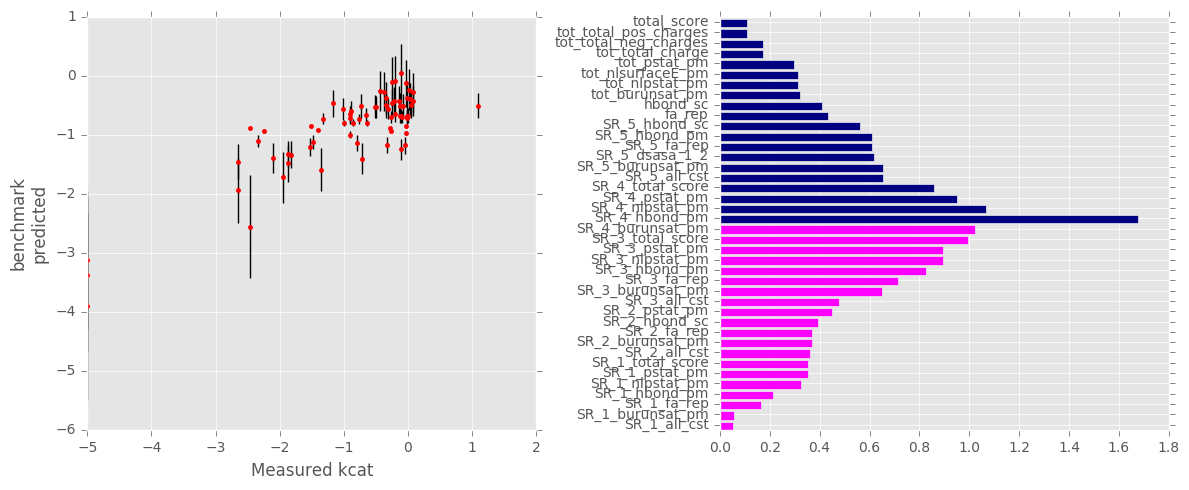

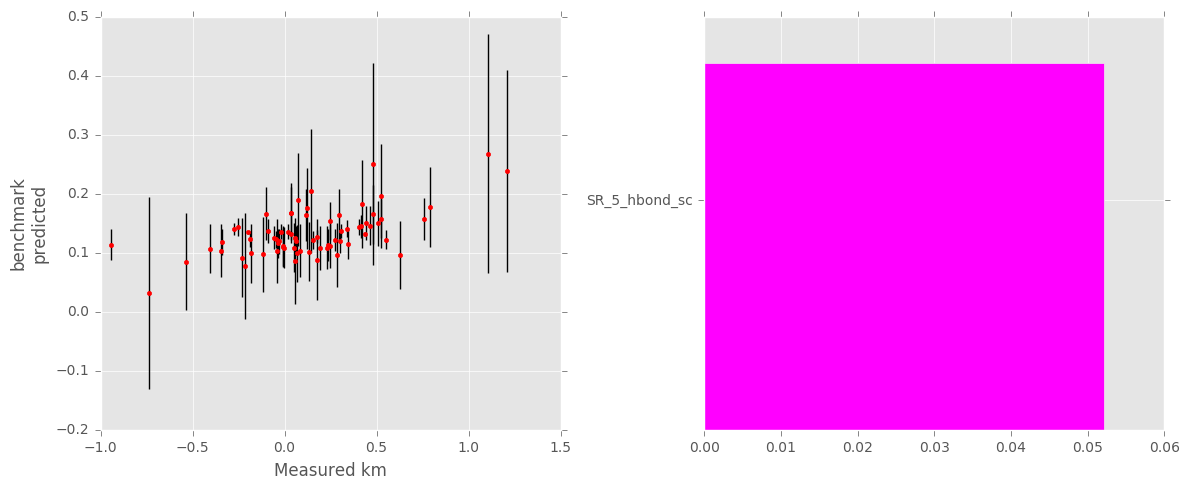

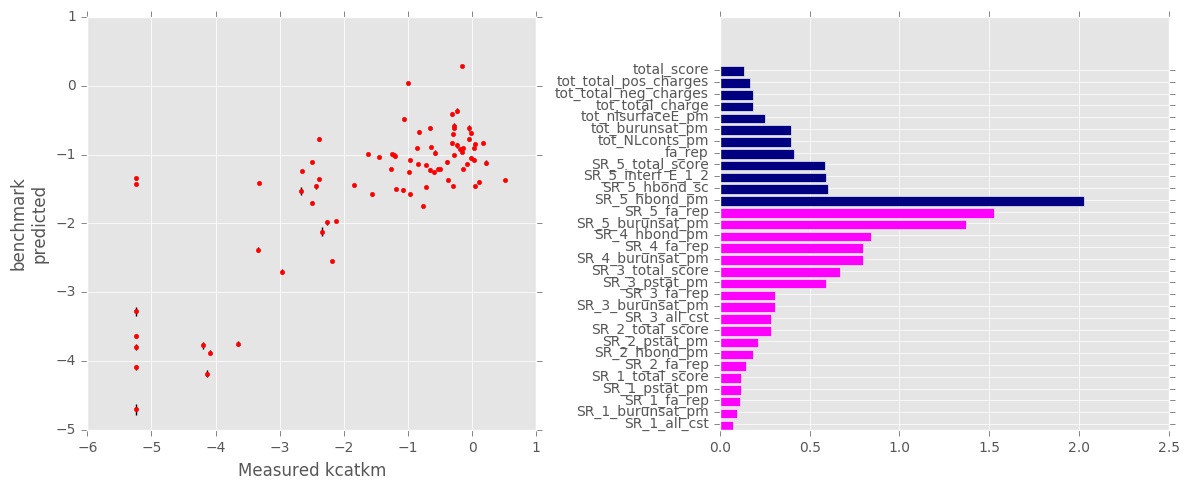

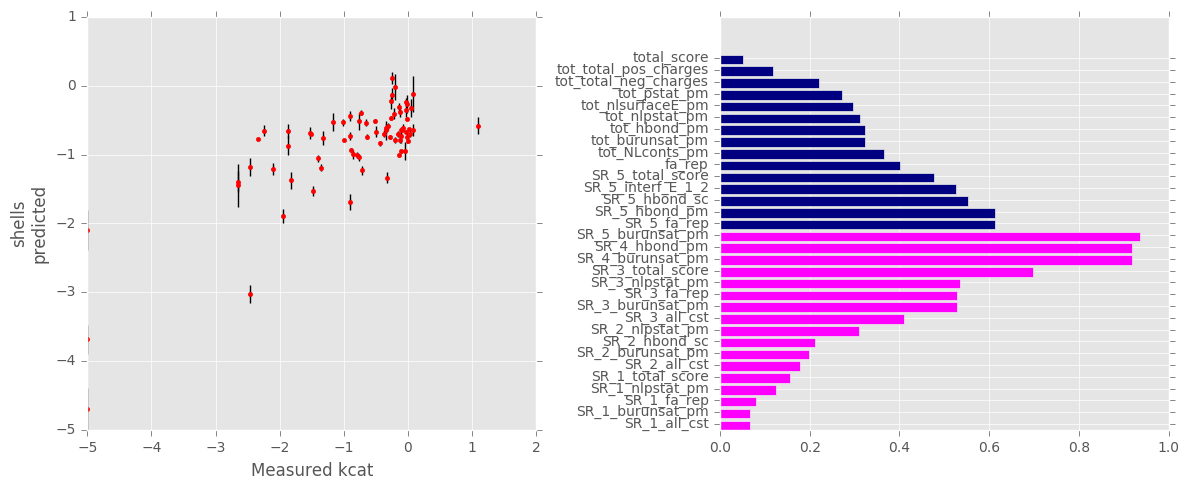

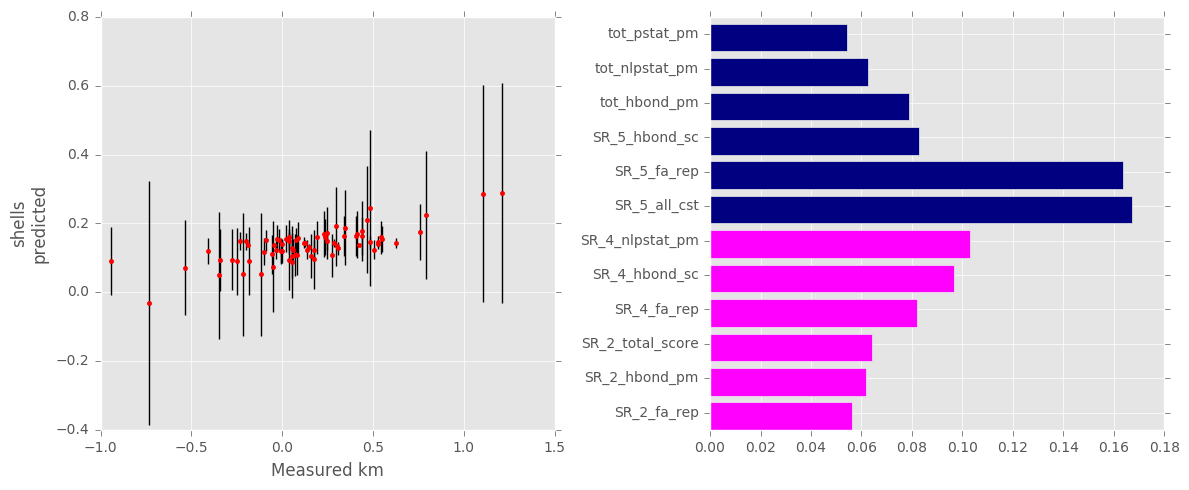

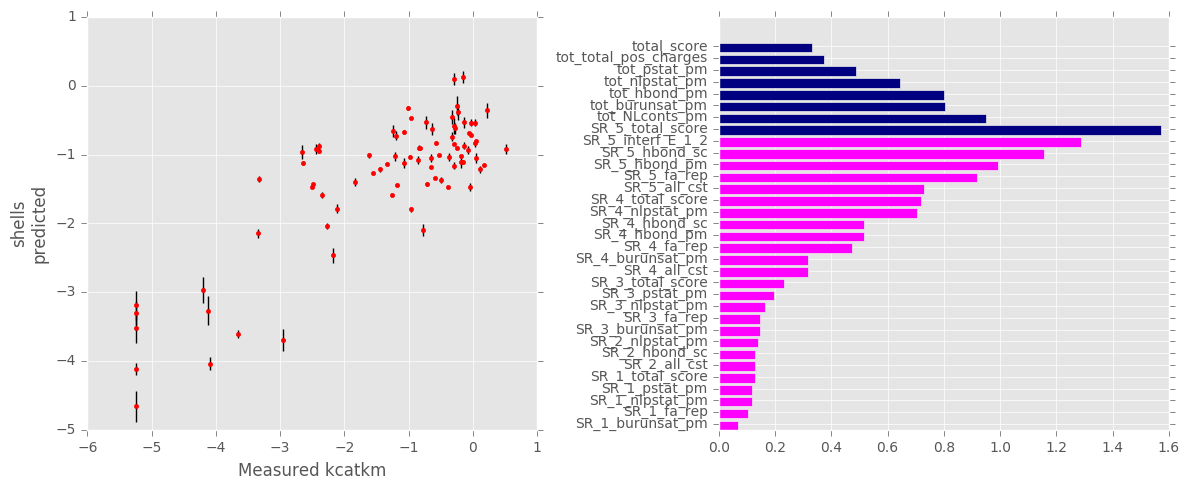

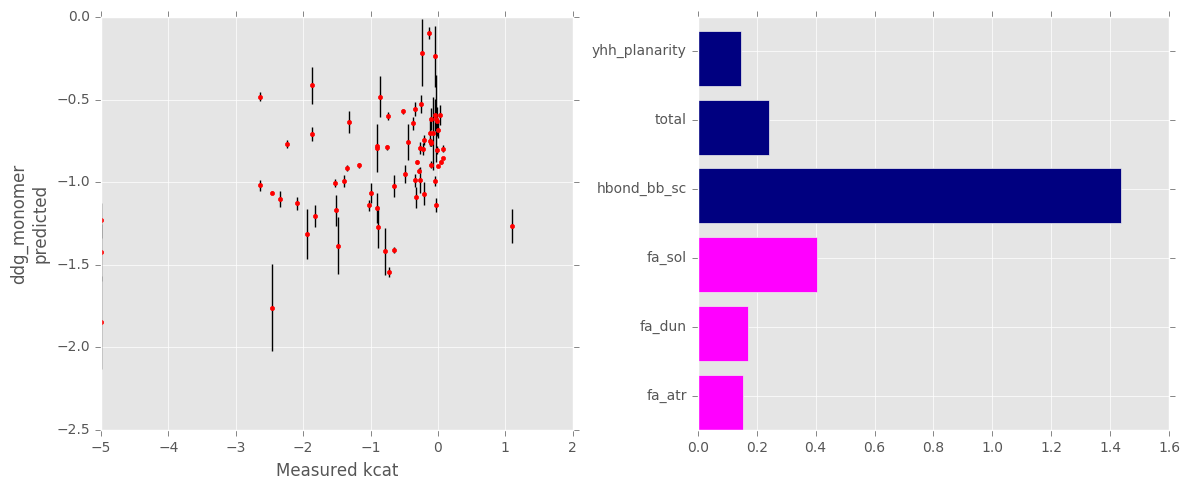

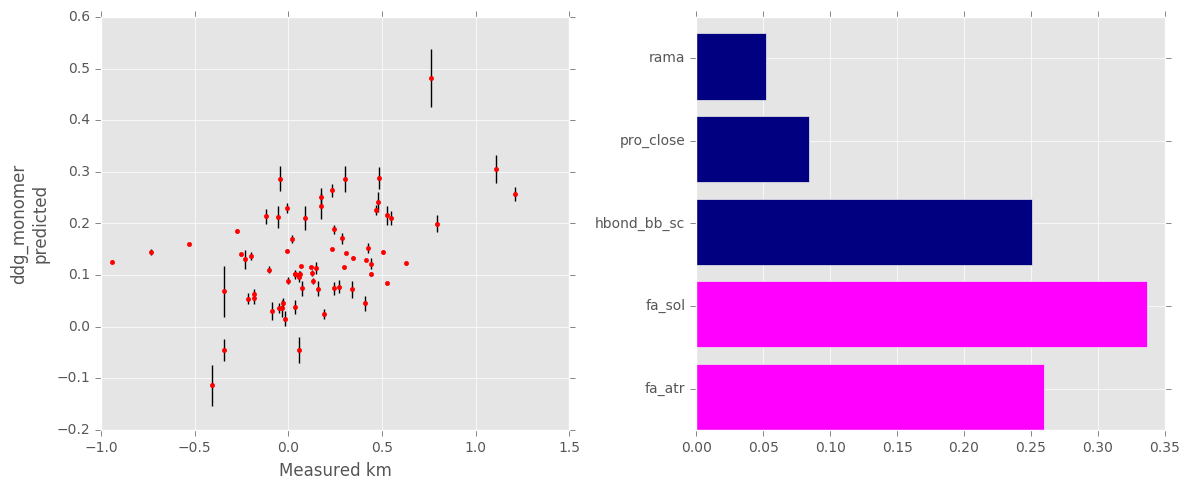

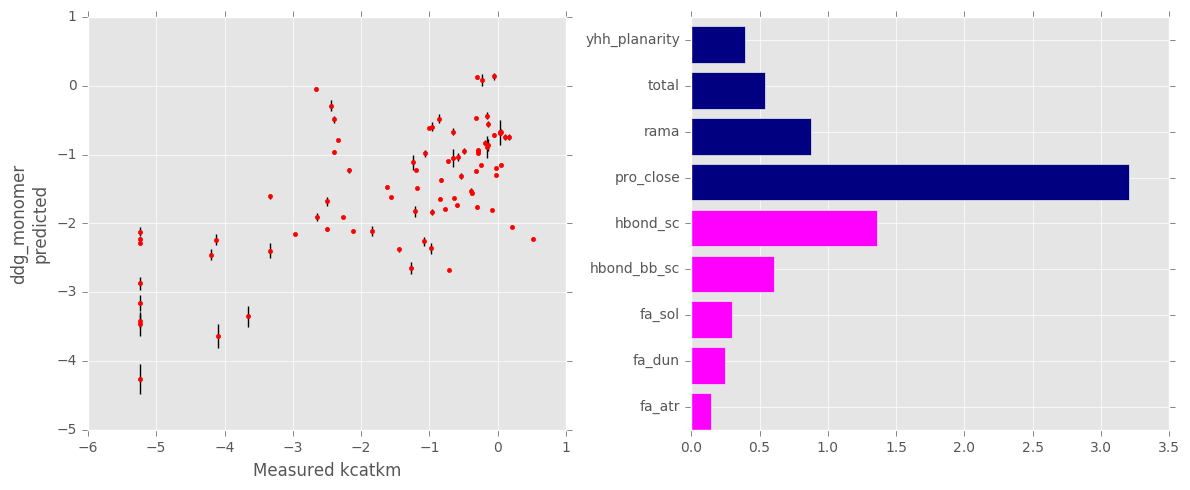

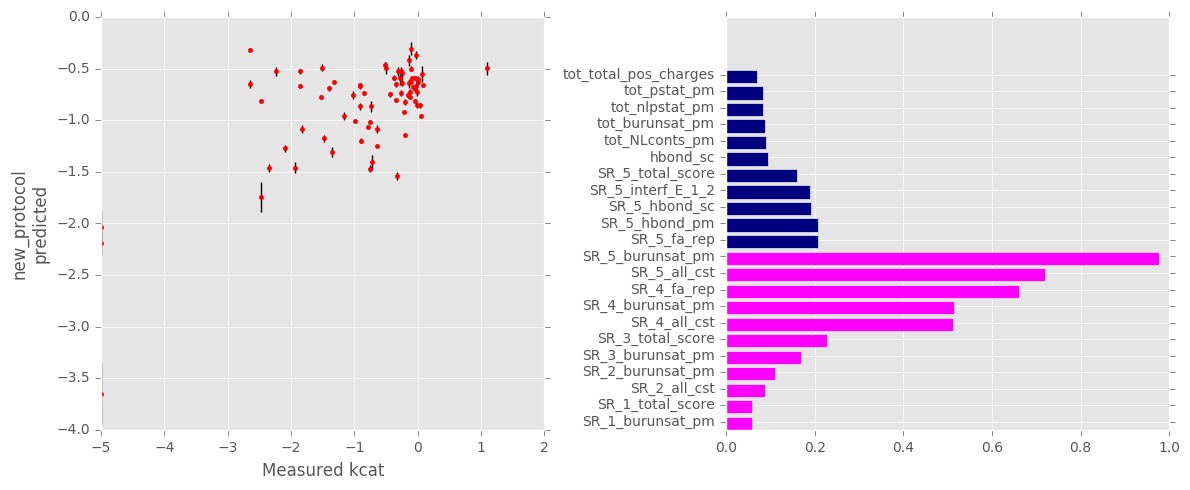

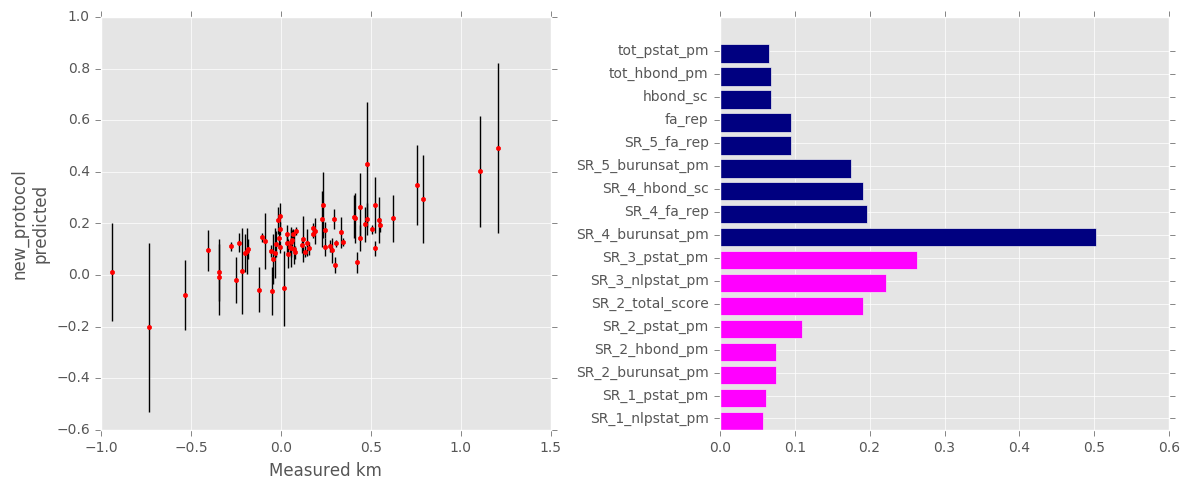

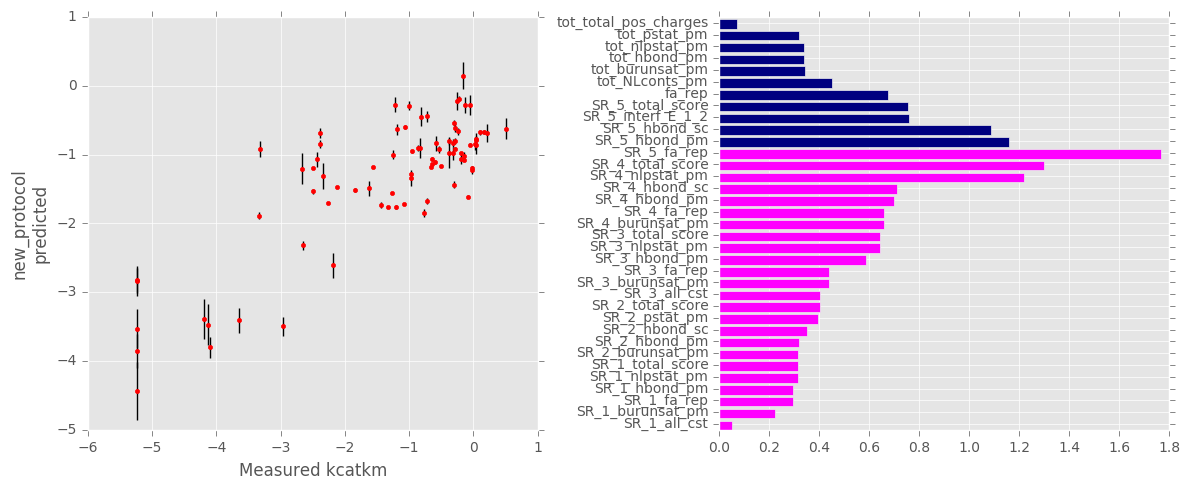

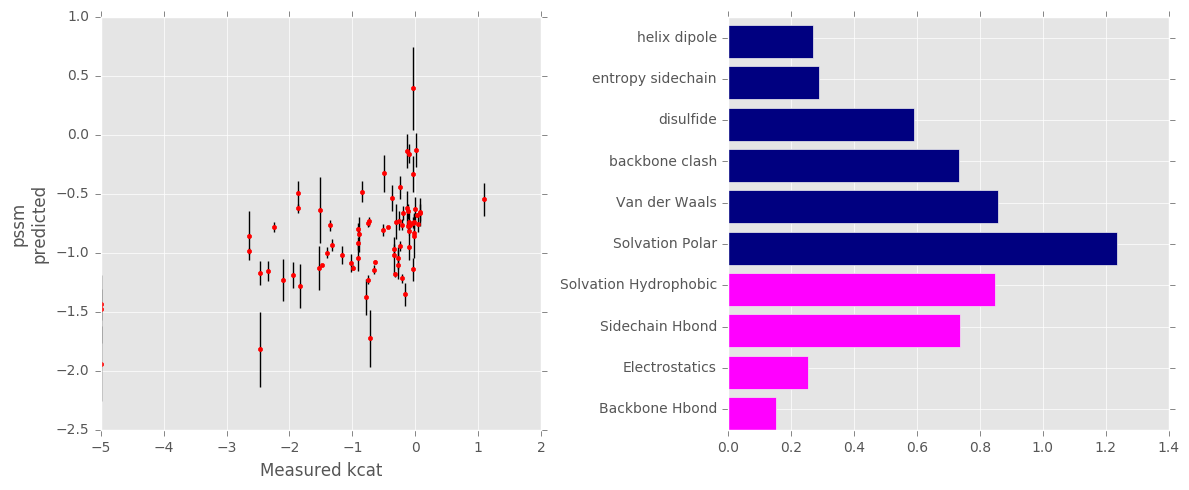

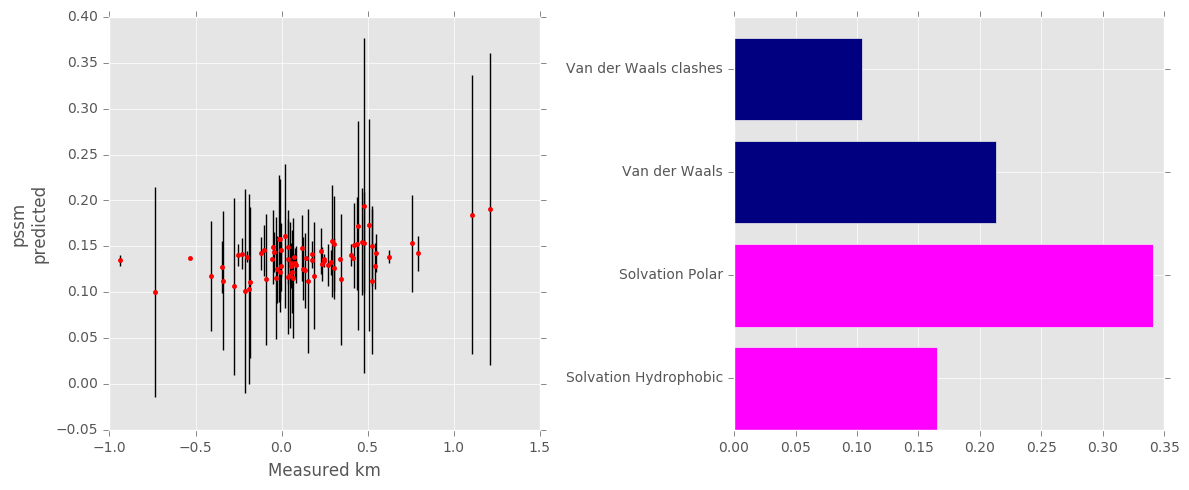

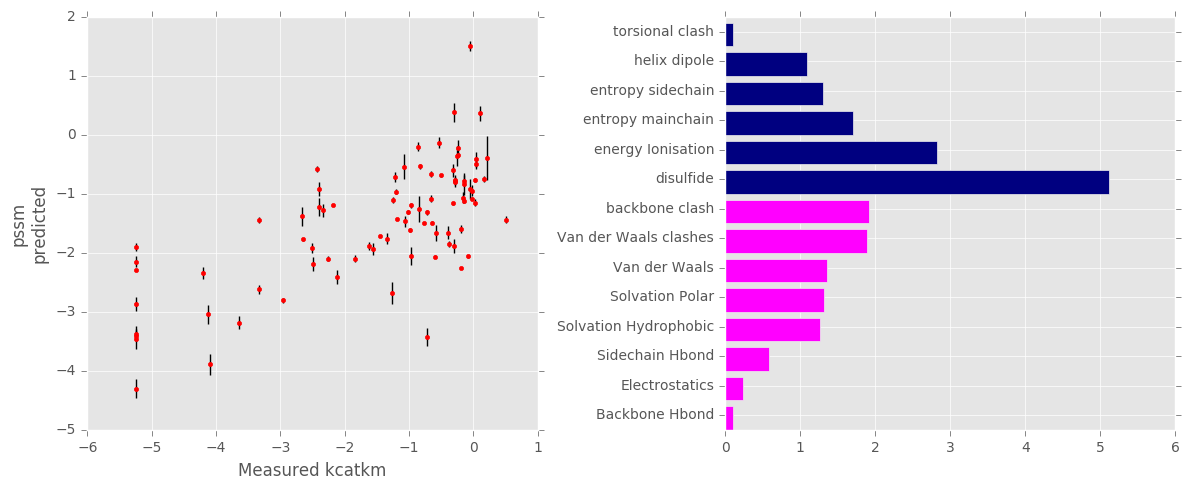

In [206]:
#plt.figure( figsize=( 12, 16 ) ) 

for i, ( nm, target, X, y, preds, score, net, coefs ) in enumerate( en_preds ):
    
        plt.figure( figsize=( 12, 5 ) ) 
        
        mean_predictions = pandas.DataFrame( preds ).mean()
        prediction_err = pandas.DataFrame( preds ).std()
        
        #plt.figure( figsize=( 4,4 ) ) 
        plt.subplot( 1, 2, 1 ) 
        #plt.scatter( y, mean_predictions, color='red' )
        plt.errorbar( y, mean_predictions, yerr=prediction_err, fmt='.',
                      color='red', ecolor='black', capsize=0 )
        plt.xlabel( 'Measured {}'.format( target ) ) 
        plt.ylabel( '{}\npredicted'.format( nm ) ) 
        
        
        plt.subplot( 1, 2, 2 ) 
        
        coef_df = pandas.DataFrame( np.concatenate( coefs ), columns=['score','wgt'] ) 
        g = coef_df.groupby( by='score' ).apply( lambda x: pandas.to_numeric( x[ 'wgt' ], errors='coerce' ).mean() ).sort_values() 
        pos = g[ g > 0.05 ] 
        neg = -g[ g < -0.05 ] 

        colors = [ 'magenta' for i in pos ] + [ 'navy' for i in neg ] 
        new_vals = np.concatenate( [ pos, neg ] ) 
        #new_vals = new_vals / new_vals.max()
        plt.barh( range( len( new_vals ) ), new_vals, color=colors )
        plt.yticks( [ i+0.5 for i in range( len( pos )+len(neg) )], pos.index.union( neg.index ) ) 
        
        #plt.barh( range( len( new_vals ) ), new_vals, color=[ np.random.choice( [ 'b', 'g' ] ) for i in range( len( new_vals ) ) ] ) 
        
#         plt.barh( range( len( pos ) ), pos ) 
#         plt.yticks( range( len( pos ) ), pos.index ) 
#         plt.barh( range( len( neg ) ), neg, color='b' ) 
#         plt.yticks( range( len( neg ) ), neg.index ) 

        
#         for i in coefs:
#             print( [ i for i in i ] )
# #        coef_str = '\n'.join( [ [ str( j ) for j in i ] for i in coefs ] ) 
#         plt.text( 0, 0, coef_str ) 
        
        plt.tight_layout()
        plt.show()
        
        
        
        #plt.scatter( y, np.mean( preds ), marker='.', color='red', alpha=.6 )
        #plt.legend( [ 'PCC={0:.2f} (p={1:.5f})'.format( *score ) ], loc='lower right', fontsize='9' ) 
        
#plt.show()